In [86]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from IPython.display import clear_output


# show all columns in DF
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/train.csv', header=0)
df.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1  

In [3]:
target_names = ['1 - Spruce/Fir', '2 - Lodgepole Pine', '3 - Ponderosa Pine', 
                '4 - Cottonwood/Willow', '5 - Aspen', '6 - Douglas-fir',
                '7 - Krummholz']

In [4]:
# Drop the ID and last column (Cover Type)
data = df.drop(['Id', df.columns[len(df.columns) - 1]], axis=1)
data.shape

(15120, 54)

In [5]:
# Store the cover type in labels
labels = df[df.columns[len(df.columns) - 1]]
labels.shape

(15120,)

In [6]:
for column in data.columns:
    print(data[column].describe(), "\n")

count    15120.000000
mean      2749.322553
std        417.678187
min       1863.000000
25%       2376.000000
50%       2752.000000
75%       3104.000000
max       3849.000000
Name: Elevation, dtype: float64 

count    15120.000000
mean       156.676653
std        110.085801
min          0.000000
25%         65.000000
50%        126.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64 

count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64 

count    15120.000000
mean       227.195701
std        210.075296
min          0.000000
25%         67.000000
50%        180.000000
75%        330.000000
max       1343.000000
Name: Horizontal_Distance_To_Hydrology, dtype: float64 

count    15120.000000
mean        51.076521
std         61.239406
min       -146.000000
25%          5.000000
50%         32.000000
75%         

In [7]:
# find columns with no variance
for column in data.columns:
    if data[column].std() == 0:
        print('Std dev 0: {}'.format(column))
        #data.drop([column], axis=1, inplace=True)

# print(data.shape)

Std dev 0: Soil_Type7
Std dev 0: Soil_Type15


In [8]:
# size of each class
labels.value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(
#     data, labels, test_size=0.33, random_state=42)

In [10]:
# std_scale = StandardScaler().fit(X_train)
# X_train_std = std_scale.transform(X_train)
# X_test_std = std_scale.transform(X_test)

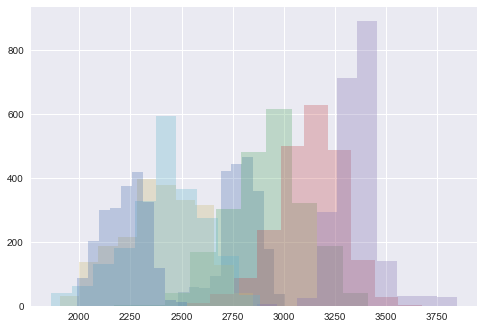

In [11]:
kwargs = dict(histtype='stepfilled', alpha=0.3)

for label in labels.unique():
    plt.hist(data.Elevation[labels==label], **kwargs)

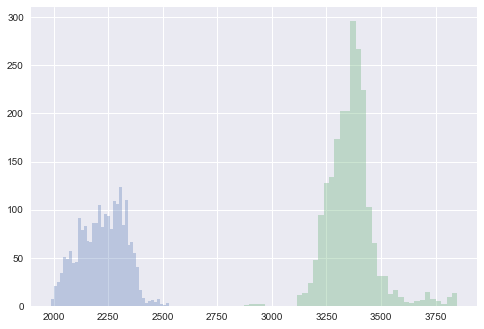

In [12]:
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

plt.hist(data.Elevation[labels==4], **kwargs)
plt.hist(data.Elevation[labels==7], **kwargs);

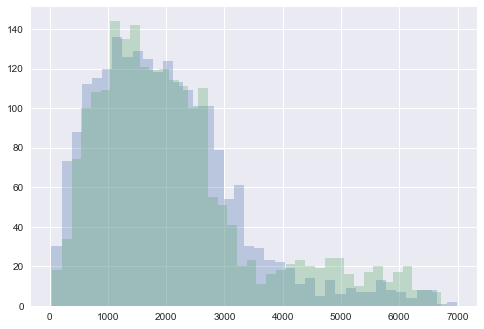

In [13]:
plt.hist(data.Horizontal_Distance_To_Fire_Points[labels==1], **kwargs)
plt.hist(data.Horizontal_Distance_To_Fire_Points[labels==2], **kwargs);

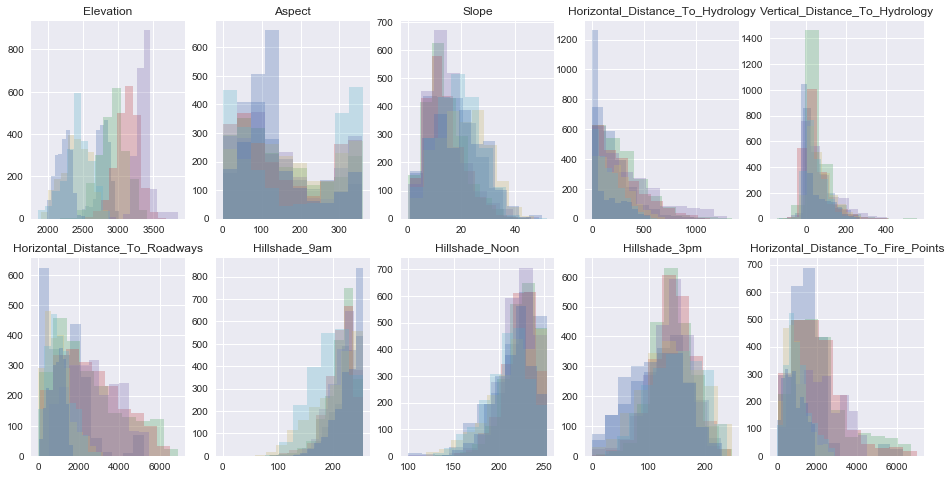

In [14]:
kwargs = dict(histtype='stepfilled', alpha=0.3)

fig, ax = plt.subplots(2, 5, figsize=(16, 8))
for i, axi in enumerate(ax.flat):
    for label in labels.unique():
        axi.hist(data.ix[labels==label, i], **kwargs)
    axi.set_title(data.columns[i])

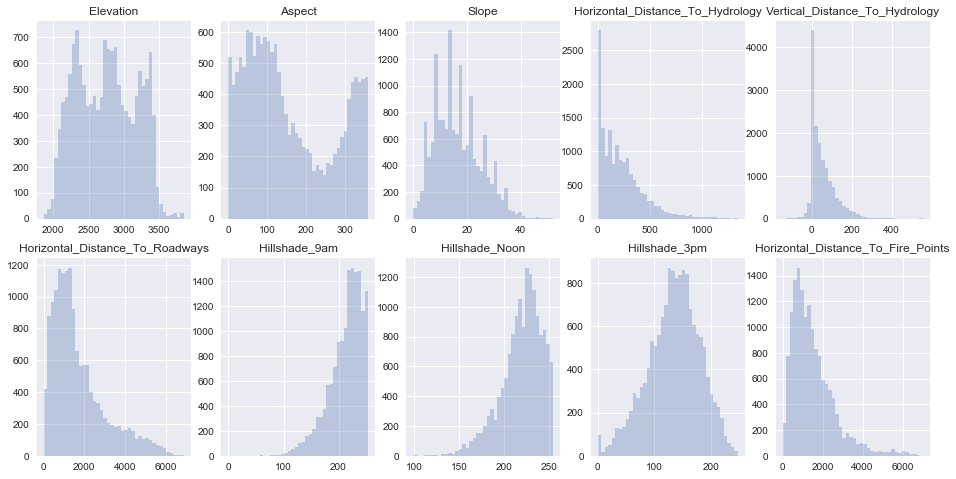

In [15]:
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)

fig, ax = plt.subplots(2, 5, figsize=(16, 8))
for i, axi in enumerate(ax.flat):
    axi.hist(data.iloc[:, i], **kwargs)
    axi.set_title(data.columns[i])

In [16]:
data.iloc[:, 0:10].corr()

Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312640   
Aspect                              -0.011096  1.000000  0.028148   
Slope                               -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology     0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology       0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways      0.578659  0.066184 -0.277049   
Hillshade_9am                        0.097900 -0.593997 -0.200072   
Hillshade_Noon                       0.215782  0.324912 -0.612613   
Hillshade_3pm                        0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points   0.443563 -0.052169 -0.239527   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412712   
Aspect                                                      0.040732   
Slope                                                      -0.055976   
Horizontal_Distance_To_Hydrology                            1.000000   
Vertical_Distance_To_Hydrology                              0.652142   
Horizontal_Distance_To_Roadways                             0.203397   
Hillshade_9am                                              -0.033803   
Hillshade_Noon                                              0.080047   
Hillshade_3pm                                               0.080833   
Horizontal_Distance_To_Fire_Points                          0.158817   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                 0.122092   
Aspect                                                    0.056412   
Slope                                                     0.265314   
Horizontal_Distance_To_Hydrology                          0.652142   
Vertical_Distance_To_Hydrology                            1.000000   
Horizontal_Distance_To_Roadways                           0.011555   
Hillshade_9am                                            -0.095930   
Hillshade_Noon                                           -0.132948   
Hillshade_3pm                                            -0.035559   
Horizontal_Distance_To_Fire_Points                       -0.015048   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.578659   
Aspect                                                     0.066184   
Slope                                                     -0.277049   
Horizontal_Distance_To_Hydrology                           0.203397   
Vertical_Distance_To_Hydrology                             0.011555   
Horizontal_Distance_To_Roadways                            1.000000   
Hillshade_9am                                             -0.003398   
Hillshade_Noon                                             0.240684   
Hillshade_3pm                                              0.173882   
Horizontal_Distance_To_Fire_Points                         0.486386   

                                    Hillshade_9am  Hillshade_Noon  \
Elevation                                0.097900        0.215782   
Aspect                                  -0.593997        0.324912   
Slope                                   -0.200072       -0.612613   
Horizontal_Distance_To_Hydrology        -0.033803        0.080047   
Vertical_Distance_To_Hydrology          -0.095930       -0.132948   
Horizontal_Distance_To_Roadways         -0.003398        0.240684   
Hillshade_9am                            1.000000       -0.013712   
Hillshade_Noon                          -0.013712        1.000000   
Hillshade_3pm                           -0.779965        0.614526   
Horizontal_Distance_To_Fire_Points       0.078144        0.122098   

                                    Hillshade_3pm  \
Elevation                                0.089518   
Aspect                                   0.635022   
Slope      

In [17]:
# Count different soil types
data.loc[:, 'Soil_Type1':'Soil_Type40'].sum(axis=1).describe()

count    15120.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

In [18]:
# Count at different wilderness areas
data.loc[:, 'Wilderness_Area1':'Wilderness_Area4'].sum(axis=1).describe()

count    15120.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
dtype: float64

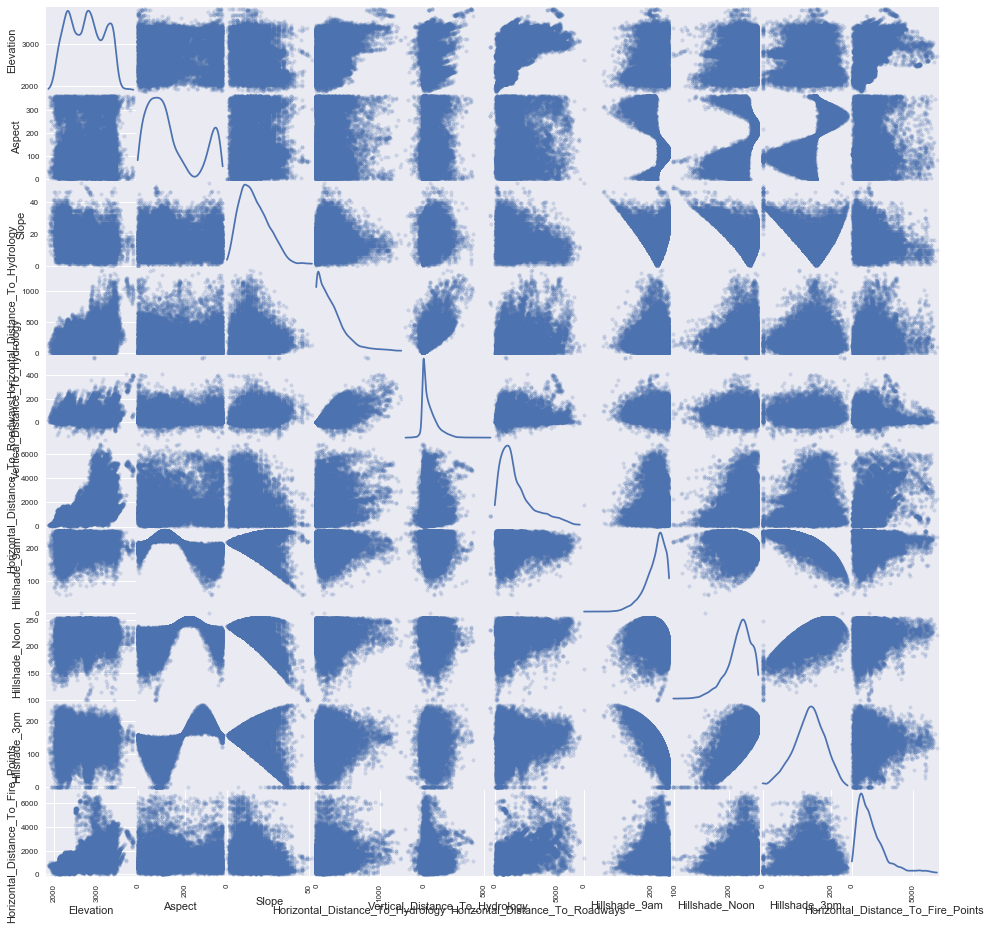

In [19]:
pd.tools.plotting.scatter_matrix(data.iloc[:, 0:10], alpha=0.2, figsize=(16, 16), diagonal='kde');

## Helper Functions

In [48]:
def split_data(data, labels):
    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=0.33, random_state=40)
    return X_train, y_train, X_test, y_test

# plot two columns
def my_scatter(col_1, col_2, figsize=(8, 6)):
    fig = plt.figure(figsize=figsize)
    plt.scatter(col_1, col_2, c=labels.values,
                s=50, alpha=.5, cmap='viridis')
    plt.xlabel(col_1.name)
    plt.ylabel(col_2.name)

In [50]:
#my_scatter(data.Elevation, data.Vertical_Distance_To_Hydrology)

### PCA

In [21]:
X_train, y_train, X_test, y_test = split_data(data, labels)

X_train_std = StandardScaler().fit_transform(X_train)
# X_train_std = std_scale.transform(X_train)
# X_test_std = std_scale.transform(X_test)


pca = PCA(n_components=2)
X_2D = pca.fit_transform(X_train_std)

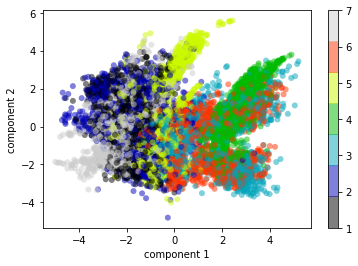

In [22]:
plt.scatter(X_2D[:, 0], X_2D[:, 1],
            c=y_train, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 7))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

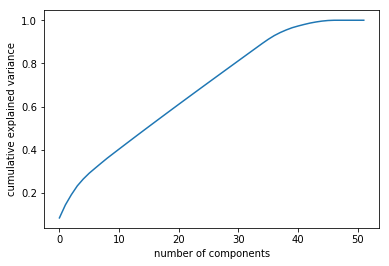

In [23]:
pca = PCA(n_components=52)
pca.fit(X_train_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

## SVM

In [25]:
X_train, y_train, X_test, y_test = split_data(data, labels)

model = make_pipeline(StandardScaler(), SVC())

param_grid = {
    'svc__kernel': ['linear', 'rbf'],  # 'linear', 'rbf'
    'svc__C': [50, 100, 200],  # 1, 5, 10, 50, 100, 200
    'svc__gamma': [.01, .05, .1]}  # 0.0001, 0.0005, 0.001, 0.005, .01, .1
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1)
%time grid.fit(X_train, y_train)

CPU times: user 4.16 s, sys: 119 ms, total: 4.28 s
Wall time: 4min 34s


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'svc__kernel': ['linear', 'rbf'], 'svc__gamma': [0.01, 0.05, 0.1], 'svc__C': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [26]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)

{'svc__gamma': 0.05, 'svc__kernel': 'rbf', 'svc__C': 50}


In [27]:
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.73      0.69      0.71       722
   2 - Lodgepole Pine       0.72      0.65      0.68       750
   3 - Ponderosa Pine       0.79      0.74      0.76       690
4 - Cottonwood/Willow       0.91      0.95      0.93       727
            5 - Aspen       0.85      0.92      0.89       701
      6 - Douglas-fir       0.79      0.84      0.81       708
        7 - Krummholz       0.91      0.96      0.93       692

          avg / total       0.81      0.82      0.82      4990



## Logistic Regression

In [156]:
model = make_pipeline(StandardScaler(), PCA(), PolynomialFeatures(), LogisticRegression())
c_vals = [1, 2, 4, 10] #[.0001, 0.001, 0.01, 0.1, 1, 2, 4, 10, 20, 50, 100]
tol = [.01]
param_grid = {
    'pca__n_components': range(21, 23),
    'polynomialfeatures__degree': range(1, 3),
    'logisticregression__C': c_vals,
    'logisticregression__tol': tol,
    'logisticregression__penalty': ['l2', 'l1']
}
grid = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=6)
%time grid.fit(X_train_std, y_train)
print('Best params for Logistic Regression: {}'. \
      format(grid.best_params_))

CPU times: user 30.1 s, sys: 504 ms, total: 30.6 s
Wall time: 15min 32s
Best params for Logistic Regression: {'logisticregression__penalty': 'l2', 'polynomialfeatures__degree': 2, 'logisticregression__tol': 0.01, 'logisticregression__C': 10, 'pca__n_components': 22}


In [157]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test_std)

{'logisticregression__penalty': 'l2', 'polynomialfeatures__degree': 2, 'logisticregression__tol': 0.01, 'logisticregression__C': 10, 'pca__n_components': 22}


In [158]:
print(classification_report(y_test, y_pred, target_names=target_names))

                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.66      0.65      0.65       679
   2 - Lodgepole Pine       0.67      0.57      0.61       722
   3 - Ponderosa Pine       0.70      0.68      0.69       704
4 - Cottonwood/Willow       0.83      0.95      0.88       739
            5 - Aspen       0.80      0.86      0.82       721
      6 - Douglas-fir       0.74      0.72      0.73       722
        7 - Krummholz       0.91      0.90      0.90       703

          avg / total       0.76      0.76      0.76      4990



## GMM

In [109]:
def run_exp(pca_n, gmm_n, cov_type):

    pca = PCA(n_components=pca_n)
    pca.fit(X_train_std)
    X_train_pca = pca.transform(X_train_std)
    X_test_pca = pca.transform(X_test_std)
    
    all_scores = np.zeros(y_test.shape)
    for label in range(1, len(target_names) + 1):
        X = X_train_pca[np.where(y_train == label)]
        gmm = GaussianMixture(n_components=gmm_n,
                              covariance_type=cov_type)
        gmm.fit(X)
        scores = gmm.score_samples(X_test_pca)
        all_scores = np.column_stack((all_scores, scores))
        
    all_scores = np.delete(all_scores, (0), axis=1)
    
    # choose the max index for each row for pred
    y_pred = all_scores.argmax(axis=1)
    y_pred = y_pred + 1
    accuracy = np.mean(y_pred == y_test)
    return accuracy

matrix_types = ('spherical', 'diag', 'tied', 'full')
n_pca_components = range(1, 55)
n_gmm_components = range(1, 55)
accuracies = []

for cov_type in matrix_types:
    for pca_n in n_pca_components:
        for gmm_n in n_gmm_components:
            accuracy = run_exp(pca_n=pca_n, 
                               gmm_n=gmm_n,
                               cov_type=cov_type)
            accuracies.append({'accuracy': accuracy, 'cov_type': cov_type,
                               'pca_n': pca_n, 'gmm_n': gmm_n})
            clear_output()
            print(len(accuracies))

print(sorted(accuracies, key=lambda k: k['accuracy'])[-1])

11664
{'pca_n': 9, 'cov_type': 'full', 'gmm_n': 42, 'accuracy': 0.80781563126252509}


## Forest Methods

### DecisionTreesClassifier

In [206]:
X_train, y_train, X_test, y_test = split_data(data, labels)

model = make_pipeline(DecisionTreeClassifier())

param_grid = {
    'decisiontreeclassifier__splitter': ['best', 'random'], 
    'decisiontreeclassifier__criterion': ['entropy', 'gini'],
    'decisiontreeclassifier__max_features': [None, 'sqrt', .5, .75],
    'decisiontreeclassifier__max_depth': [None, 20, 30],
    'decisiontreeclassifier__random_state': [42],
}
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
%time grid.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s


CPU times: user 940 ms, sys: 139 ms, total: 1.08 s
Wall time: 2.01 s


[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    1.7s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'decisiontreeclassifier__max_depth': [None, 20, 30], 'decisiontreeclassifier__random_state': [42], 'decisiontreeclassifier__splitter': ['best', 'random'], 'decisiontreeclassifier__criterion': ['entropy', 'gini'], 'decisiontreeclassifier__max_features': [None, 'sqrt', 0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [207]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

{'decisiontreeclassifier__max_depth': 30, 'decisiontreeclassifier__random_state': 42, 'decisiontreeclassifier__splitter': 'random', 'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_features': None}
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.67      0.69      0.68       722
   2 - Lodgepole Pine       0.66      0.61      0.63       750
   3 - Ponderosa Pine       0.74      0.72      0.73       690
4 - Cottonwood/Willow       0.92      0.93      0.92       727
            5 - Aspen       0.86      0.88      0.87       701
      6 - Douglas-fir       0.74      0.74      0.74       708
        7 - Krummholz       0.90      0.94      0.92       692

          avg / total       0.78      0.78      0.78      4990



### RandomForestClassifier

In [208]:
X_train, y_train, X_test, y_test = split_data(data, labels)

model = make_pipeline(RandomForestClassifier())

param_grid = {
    'randomforestclassifier__n_estimators': [1000, 2000, 3000], 
    'randomforestclassifier__criterion': ['entropy', 'gini'],
    'randomforestclassifier__max_features': ['sqrt', 20],
    'randomforestclassifier__max_depth': [25, 30, 35],
    'randomforestclassifier__bootstrap': [True, False],
}
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
%time grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 28.3min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 33.5min finished


CPU times: user 50.4 s, sys: 895 ms, total: 51.3 s
Wall time: 34min 19s


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestclassifier__criterion': ['entropy', 'gini'], 'randomforestclassifier__max_depth': [25, 30, 35], 'randomforestclassifier__n_estimators': [1000, 2000, 3000], 'randomforestclassifier__max_features': ['sqrt', 20], 'randomforestclassifier__bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [209]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

{'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__bootstrap': False, 'randomforestclassifier__max_features': 20, 'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__max_depth': 30}
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.79      0.78      0.78       722
   2 - Lodgepole Pine       0.79      0.71      0.75       750
   3 - Ponderosa Pine       0.87      0.85      0.86       690
4 - Cottonwood/Willow       0.94      0.97      0.96       727
            5 - Aspen       0.91      0.94      0.92       701
      6 - Douglas-fir       0.86      0.89      0.88       708
        7 - Krummholz       0.93      0.97      0.95       692

          avg / total       0.87      0.87      0.87      4990



### AdaBoostClassifier

In [211]:
X_train, y_train, X_test, y_test = split_data(data, labels)

abc = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(criterion="entropy", splitter="best", random_state=42), 
    n_estimators=200, learning_rate=0.1)

abc.fit(X_train, y_train)
print ('Accuracy (adaboost with decision trees):', abc.score(X_test, y_test))

Accuracy (adaboost with decision trees): 0.778356713427


### GradientBoostingClassifier

In [204]:
X_train, y_train, X_test, y_test = split_data(data, labels)

model = make_pipeline(GradientBoostingClassifier())

param_grid = {
    'gradientboostingclassifier__n_estimators': [1000, 2000, 3000], 
    'gradientboostingclassifier__max_features': ['sqrt', 10, 20],
    'gradientboostingclassifier__max_depth': [5, 10, 15,],
    'gradientboostingclassifier__learning_rate': [.05, .1],
}
grid = GridSearchCV(model, param_grid, cv=3, n_jobs=-1, verbose=1)
%time grid.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 37.9min finished


CPU times: user 1min 57s, sys: 773 ms, total: 1min 58s
Wall time: 39min 50s


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gradientboostingclassifier__max_features': ['sqrt', 10, 20], 'gradientboostingclassifier__n_estimators': [1000, 2000, 3000], 'gradientboostingclassifier__learning_rate': [0.05, 0.1], 'gradientboostingclassifier__max_depth': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [205]:
print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

{'gradientboostingclassifier__max_features': 20, 'gradientboostingclassifier__n_estimators': 2000, 'gradientboostingclassifier__max_depth': 15, 'gradientboostingclassifier__learning_rate': 0.05}
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.78      0.75      0.77       722
   2 - Lodgepole Pine       0.77      0.71      0.74       750
   3 - Ponderosa Pine       0.85      0.85      0.85       690
4 - Cottonwood/Willow       0.95      0.97      0.96       727
            5 - Aspen       0.90      0.93      0.92       701
      6 - Douglas-fir       0.85      0.88      0.86       708
        7 - Krummholz       0.93      0.96      0.95       692

          avg / total       0.86      0.86      0.86      4990



### ExtraTreesClassifier

In [90]:
X_train, y_train, X_test, y_test = split_data(data, labels)

pipe = make_pipeline(ExtraTreesClassifier())

param_grid = {
    'extratreesclassifier__n_estimators': [1000, 2000, 3000], 
    'extratreesclassifier__criterion': ['entropy', 'gini'],
    'extratreesclassifier__max_features': ['auto','sqrt', 'log2', None],
    'extratreesclassifier__max_depth': [25, 30, 35],
    'extratreesclassifier__bootstrap': [True, False],
}
grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=1)
%time grid.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 41.0min finished


CPU times: user 55.1 s, sys: 2.09 s, total: 57.1 s
Wall time: 41min 48s


GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('extratreesclassifier', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'extratreesclassifier__bootstrap': [True, False], 'extratreesclassifier__max_features': ['auto', 'sqrt', 'log2', None], 'extratreesclassifier__n_estimators': [1000, 2000, 3000], 'extratreesclassifier__criterion': ['entropy', 'gini'], 'extratreesclassifier__max_depth': [25, 30, 35]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [91]:
print(grid.best_params_)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))

{'extratreesclassifier__bootstrap': False, 'extratreesclassifier__max_depth': 25, 'extratreesclassifier__criterion': 'gini', 'extratreesclassifier__n_estimators': 2000, 'extratreesclassifier__max_features': None}
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.78      0.78      0.78       722
   2 - Lodgepole Pine       0.79      0.70      0.74       750
   3 - Ponderosa Pine       0.87      0.87      0.87       690
4 - Cottonwood/Willow       0.94      0.97      0.95       727
            5 - Aspen       0.90      0.95      0.92       701
      6 - Douglas-fir       0.88      0.89      0.89       708
        7 - Krummholz       0.94      0.96      0.95       692

          avg / total       0.87      0.87      0.87      4990



## Feature Selection

In [21]:
def remove_features(data, feature_list):
    new_data = data.copy(deep=True)
    new_data.drop(new_data.columns[feature_list], axis=1, inplace=True)
    return new_data

In [22]:
# baseline
X_train, y_train, X_test, y_test = split_data(data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.67855711422845688

### Stepwise selection with LogisticRegression

In [23]:
X_train, y_train, X_test, y_test = split_data(data, labels)

X_train = X_train.astype(float)
X_test = X_test.astype(float)

max_columns = data.shape[1]

max_accuracy = 0
bad_features = []
for i in range(0, max_columns):
    lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
    lr_pipe.fit(X_train.as_matrix()[:, 0:i+1], y_train)
    y_pred = lr_pipe.predict(X_test.as_matrix()[:, 0:i+1])
    
    new_accurancy = np.mean(y_pred == y_test)
    
    if new_accurancy < max_accuracy:
        bad_features.append(i)
    
    if new_accurancy > max_accuracy:
        max_accuracy = new_accurancy
    
    print("Column {}:".format(i), new_accurancy, 'worse' if i in bad_features else '')

Column 0: 0.540480961924 
Column 1: 0.527254509018 worse
Column 2: 0.523046092184 worse
Column 3: 0.537875751503 worse
Column 4: 0.541482965932 
Column 5: 0.543286573146 
Column 6: 0.578356713427 
Column 7: 0.592585170341 
Column 8: 0.594388777555 
Column 9: 0.595591182365 
Column 10: 0.605611222445 
Column 11: 0.604809619238 worse
Column 12: 0.612024048096 
Column 13: 0.612224448898 
Column 14: 0.61503006012 
Column 15: 0.619038076152 
Column 16: 0.620641282565 
Column 17: 0.639879759519 
Column 18: 0.637274549098 worse
Column 19: 0.639278557114 worse
Column 20: 0.639278557114 worse
Column 21: 0.639278557114 worse
Column 22: 0.639679358717 worse
Column 23: 0.653507014028 
Column 24: 0.651503006012 worse
Column 25: 0.65751503006 
Column 26: 0.658517034068 
Column 27: 0.659919839679 
Column 28: 0.659919839679 
Column 29: 0.659519038076 worse
Column 30: 0.661122244489 
Column 31: 0.663527054108 
Column 32: 0.663126252505 worse
Column 33: 0.663927855711 
Column 34: 0.663927855711 
Column 

In [24]:
# New accuracy with removed features

new_data = remove_features(data, bad_features)

print(new_data.shape)

X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

new_accuracy = np.mean(y_pred == y_test)
new_accuracy

(15120, 32)


0.6667334669338677

### Ridge Regression to choose features

In [120]:
X_train, y_train, X_test, y_test = split_data(data, labels)

lr_pipe = make_pipeline(StandardScaler(), RidgeClassifier())
lr_pipe.fit(X_train, y_train)

y_pred = lr_pipe.predict(X_test)

new_accuracy = np.mean(y_pred == y_test)

coefs = lr_pipe.named_steps['ridgeclassifier'].coef_

indexes = np.nonzero(coefs == 0)[1]
zero_features = np.unique(indexes)

# for i, feature in enumerate(data.columns):
#     print(i, feature)

print('Columns to remove:')
for i in zero_features:
    print(data.columns[i])
    
print('Accuracy with Ridge Regression: {}'.format(new_accuracy))

Columns to remove:
Soil_Type7
Soil_Type8
Soil_Type15
Soil_Type25
Accuracy with Ridge Regression: 0.6376753507014028


### Random Forest Feature Selection

In [26]:
X_train, y_train, X_test, y_test = split_data(data, labels)

lr_pipe = make_pipeline(RandomForestClassifier())
lr_pipe.fit(X_train, y_train)

y_pred = lr_pipe.predict(X_test)

new_accuracy = np.mean(y_pred == y_test)

features = lr_pipe.named_steps['randomforestclassifier'].feature_importances_

features = sorted(zip(features, data.columns), reverse=True)
for f in features:
    print('{:6.4f}, {}'.format(f[0], f[1]))

0.2301, Elevation
0.0877, Horizontal_Distance_To_Roadways
0.0731, Horizontal_Distance_To_Fire_Points
0.0651, Horizontal_Distance_To_Hydrology
0.0561, Vertical_Distance_To_Hydrology
0.0490, Aspect
0.0484, Hillshade_3pm
0.0481, Hillshade_Noon
0.0479, Hillshade_9am
0.0445, Wilderness_Area4
0.0360, Slope
0.0243, Soil_Type38
0.0212, Soil_Type10
0.0208, Soil_Type3
0.0182, Soil_Type39
0.0157, Wilderness_Area3
0.0135, Soil_Type4
0.0115, Wilderness_Area1
0.0083, Soil_Type30
0.0078, Soil_Type40
0.0070, Soil_Type17
0.0061, Soil_Type13
0.0056, Soil_Type12
0.0052, Soil_Type22
0.0051, Soil_Type2
0.0046, Soil_Type32
0.0044, Soil_Type29
0.0043, Soil_Type23
0.0041, Soil_Type11
0.0039, Soil_Type35
0.0034, Soil_Type33
0.0032, Wilderness_Area2
0.0027, Soil_Type31
0.0024, Soil_Type24
0.0018, Soil_Type6
0.0017, Soil_Type20
0.0016, Soil_Type5
0.0013, Soil_Type1
0.0010, Soil_Type16
0.0007, Soil_Type26
0.0004, Soil_Type14
0.0004, Soil_Type19
0.0003, Soil_Type18
0.0003, Soil_Type27
0.0003, Soil_Type34
0.0002, S

## Feature Engineering

In [27]:
## Base Line Random Forest
def base_line_rfc(data):
    X_train, y_train, X_test, y_test = split_data(data, labels)
    lr_pipe = make_pipeline(RandomForestClassifier())
    lr_pipe.fit(X_train, y_train)
    y_pred = lr_pipe.predict(X_test)

    accuracy = np.mean(y_pred == y_test)
    return accuracy

base_rfc_accuracy = base_line_rfc(data)
base_rfc_accuracy

0.82565130260521047

In [28]:
## Base Line Logistic
def base_line_lr(data):
    X_train, y_train, X_test, y_test = split_data(data, labels)

    lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())

    lr_pipe.fit(X_train, y_train)
    y_pred = lr_pipe.predict(X_test)

    accuracy = np.mean(y_pred == y_test)
    return accuracy

base_lr_accuracy = base_line_lr(data)
base_lr_accuracy

0.67855711422845688

In [29]:
def print_base_results(new_data):
    print('Base RFC: {:.4f}, New RFC: {:.4f}'.format(base_rfc_accuracy, base_line_rfc(new_data)))
    print('Base LR:  {:.4f}, New LR:  {:.4f}'.format(base_lr_accuracy, base_line_lr(new_data)))

### Binning hillshade_9am

In [30]:
def bin_hillshade_9am_feat(data):
    new_data = data.copy(deep=True)

    noon_bins = np.linspace(0, 255, 8)
    which_bin = np.digitize(new_data.Hillshade_9am, bins=noon_bins)
    encoder = OneHotEncoder(sparse=False)
    encoder.fit(which_bin.reshape(-1, 1))
    X_noon_binned = pd.DataFrame(encoder.transform(which_bin.reshape(-1, 1)))

    new_data = pd.concat([new_data, X_noon_binned], axis=1)

    return new_data

In [31]:
new_data = bin_hillshade_9am_feat(data)
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8164
Base LR:  0.6786, New LR:  0.6842


### Convert aspect to cardinal direction (north, south, east, west)

In [32]:
def convert_to_cardinal_feat(data):
    new_data = data.copy(deep=True)
    dir_labels = ['north east', 'east north', 'east south', 'south east', 
              'south west', 'west south', 'west north', 'north west']
    new_data.loc[:, ('direction')] = pd.cut(data.loc[:, ('Aspect')], range(0, 365, 45), right=False, labels=dir_labels)

    new_data.direction = new_data.direction.replace('east north', 'north') \
        .replace('north west', 'north') \
        .replace('east north', 'east').replace('east south', 'east').replace('south east', 'south') \
        .replace('south west', 'south').replace('west south', 'west').replace('west north', 'west') \
        .replace('north east', 'north')

    new_data = pd.get_dummies(new_data)
    return new_data

In [33]:
new_data = convert_to_cardinal_feat(data)
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8279
Base LR:  0.6786, New LR:  0.6808


### Convert horizontal and vertical distance to hydrology to euclidean distance

In [34]:
new_data = data.copy(deep=True)

new_data.loc[:, ('euclid_to_hydro')] = np.sqrt(new_data.Horizontal_Distance_To_Hydrology ** 2 \
                                               + new_data.Vertical_Distance_To_Hydrology ** 2)

new_data.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], 
              axis=1, inplace=True)
new_data.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Roadways  Hillshade_9am  \
0       2596      51      3                              510            221   
1       2590      56      2                              390            220   
2       2804     139      9                             3180            234   
3       2785     155     18                             3090            238   
4       2595      45      2                              391            220   

   Hillshade_Noon  Hillshade_3pm  Horizontal_Distance_To_Fire_Points  \
0             232            148                                6279   
1             235            151                                6225   
2             238            135                                6121   
3             238            122                                6211   
4             234            150                                6172   

   Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  \
0                 1                 0                 0                 0   
1                 1                 0                 0                 0   
2                 1                 0                 0                 0   
3                 1                 0                 0                 0   
4                 1                 0                 0                 0   

   Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  \
0           0           0           0            0            0            0   
1           0           0           0            0            0            0   
2           0           0           0            0            0            1   
3           0           0           0            0            0            0   
4           0           0           0            0            0            0   

   Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  \
0            0            1            0            0            0   
1            0            1            0            0            0   
2            0            0            0            0            0   
3            0            0            1            0            0   
4            0            1            0            0            0   

   S

In [35]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.67434869739478953

### Multiply elevation and Slope

In [36]:
def multiply_elevation_slope(data=None):
    new_data = data.copy(deep=True)
    new_data.loc[:, ('elevation_x_slope')] = new_data.Elevation * new_data.Slope
    return new_data

new_data = multiply_elevation_slope(data)
new_data.drop(['Elevation', 'Slope'], axis=1, inplace=True)
new_data.head()

Aspect  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
0      51                               258                               0   
1      56                               212                              -6   
2     139                               268                              65   
3     155                               242                             118   
4      45                               153                              -1   

   Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
0                              510            221             232   
1                              390            220             235   
2                             3180            234             238   
3                             3090            238             238   
4                              391            220             234   

   Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
0            148                                6279                 1   
1            151                                6225                 1   
2            135                                6121                 1   
3            122                                6211                 1   
4            150                                6172                 1   

   Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  \
0                 0                 0                 0           0   
1                 0                 0                 0           0   
2                 0                 0                 0           0   
3                 0                 0                 0           0   
4                 0                 0                 0           0   

   Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  \
0           0           0            0            0            0            0   
1           0           0            0            0            0            0   
2           0           0            0            0            1            0   
3           0           0            0            0            0            0   
4           0           0            0            0            0            0   

   Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type29  Soil_Type30 

In [37]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.64428857715430865

### Polynomial Features

In [38]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression())
c_vals = [20, 25, 30, 35]
tol = [.01]
penalty = ['l1', 'l2']
degree = range(1, 3)
param_grid = {
    'polynomialfeatures__degree': degree,
    'logisticregression__C': c_vals,
    'logisticregression__tol': tol,
    'logisticregression__penalty': penalty,
}
grid = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)

X_train, y_train, X_test, y_test = split_data(data, labels)

%time grid.fit(X_train, y_train)
print('Best params for Logistic Regression: {}'. \
      format(grid.best_params_))

print(grid.best_params_)
model = grid.best_estimator_
y_pred = model.predict(X_test)
print('Accuracy: {}'.format(np.mean(y_pred == y_test)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits


KeyboardInterrupt: 

#### Best Poly Features with Cardinal Direction

In [ ]:
new_data = convert_to_cardinal(data)
X_train, y_train, X_test, y_test = split_data(new_data, labels)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), 
                     LogisticRegression(C=25, tol=.01, penalty='l2'))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy: {}'.format(np.mean(y_pred == y_test)))

### Ground Features

In [39]:
# condense soil types based on their descriptions

######### Extremely_Stony #################
# 1 Cathedral family - Rock outcrop complex, extremely stony.
# 24 Leighcan family, extremely stony.
# 25 Leighcan family, warm, extremely stony.
# 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
# 28 Leighcan family - Rock outcrop complex, extremely stony.
# 29 Como - Legault families complex, extremely stony.
# 30 Como family - Rock land - Legault family complex, extremely stony.
# 31 Leighcan - Catamount families complex, extremely stony.
# 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
# 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
# 34 Cryorthents - Rock land complex, extremely stony.
# 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
# 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
# 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
# 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
# 40 Moran family - Cryorthents - Rock land complex, extremely stony.

######## Very_Stony #############
# 2 Vanet - Ratake families complex, very stony.
# 9 Troutville family, very stony.
# 18 Rogert family, very stony.
# 26 Granile - Catamount families complex, very stony.

####### Stony ############
# 6 Vanet - Wetmore families - Rock outcrop complex, stony.
# 12 Legault family - Rock land complex, stony.

####### Rubbly ##############
# 3 Haploborolis - Rock outcrop complex, rubbly.
# 4 Ratake family - Rock outcrop complex, rubbly.
# 5 Vanet family - Rock outcrop complex complex, rubbly.
# 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
# 11 Bullwark - Catamount families - Rock land complex, rubbly.
# 13 Catamount family - Rock land - Bullwark family complex, rubbly.

####### Complex ############
# 8 Supervisor - Limber families complex.
# 14 Pachic Argiborolis - Aquolis complex.
# 16 Cryaquolis - Cryoborolis complex.
# 17 Gateview family - Cryaquolis complex.
# 19 Typic Cryaquolis - Borohemists complex.
# 20 Typic Cryaquepts - Typic Cryaquolls complex.
# 21 Typic Cryaquolls - Leighcan family, till substratum complex.
# 23 Leighcan family, till substratum - Typic Cryaquolls complex.
# 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.

######### Extremely_Bouldery ###########
# 22 Leighcan family, till substratum, extremely bouldery.

######### Delete these since there's no data in our training set ########
# 7 Gothic family.
# 15 unspecified in the USFS Soil and ELU Survey.

new_data = data.copy(deep=True)

new_data['Extremely_Stony'] = ((new_data.Soil_Type1 + new_data.Soil_Type24 + \
                                new_data.Soil_Type25 + new_data.Soil_Type27 + \
                                new_data.Soil_Type28 + new_data.Soil_Type29 + \
                                new_data.Soil_Type30 + new_data.Soil_Type31 + \
                                new_data.Soil_Type32 + new_data.Soil_Type33 + \
                                new_data.Soil_Type34 + new_data.Soil_Type36 + \
                                new_data.Soil_Type37 + new_data.Soil_Type38 + \
                                new_data.Soil_Type39 + new_data.Soil_Type40) >= 1).astype(int)
new_data['Very_Stony'] = ((new_data.Soil_Type2 + new_data.Soil_Type9 + \
                           new_data.Soil_Type18 + new_data.Soil_Type26) >= 1).astype(int)
new_data['Stony'] = ((new_data.Soil_Type6 + new_data.Soil_Type12) >= 1).astype(int)
new_data['Rubbly'] = ((new_data.Soil_Type3 + new_data.Soil_Type4 + \
                       new_data.Soil_Type5 + new_data.Soil_Type10 + \
                       new_data.Soil_Type11 + new_data.Soil_Type13) >= 1).astype(int)
new_data['Complex'] = ((new_data.Soil_Type8 + new_data.Soil_Type14 + \
                       new_data.Soil_Type16 + new_data.Soil_Type17 + \
                       new_data.Soil_Type19 + new_data.Soil_Type20 + \
                       new_data.Soil_Type21 + new_data.Soil_Type23 + \
                       new_data.Soil_Type35) >= 1).astype(int)
new_data['Extremely_Bouldery'] = (new_data.Soil_Type22 >= 1).astype(int)

new_data.drop(new_data.columns[14:54], axis=1, inplace=True)
new_data.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Extremely_Stony  Very_Stony  Stony  \
0                 0                 0                1           0      0   
1                 0                 0                1           0      0   
2                 0                 0                0           0      1   
3                 0                 0                1           0      0   
4                 0                 0                1           0      0   

   Rubbly  Complex  Extremely_Bouldery  
0       0        0                   0  
1       0        0                   0  
2       0        0                   0  
3       0        0                   0  
4       0        0                   0

In [40]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

lr_pipe = make_pipeline(StandardScaler(), LogisticRegression())
    
lr_pipe.fit(X_train, y_train)
y_pred = lr_pipe.predict(X_test)

accuracy = np.mean(y_pred == y_test)
accuracy

0.62444889779559121

### Total Sunlight

In [41]:
def total_sunlight_feat(data):
    new_data = data.copy(deep=True)
    new_data['total_sun'] = new_data.Hillshade_9am + new_data.Hillshade_Noon + \
                                 new_data.Hillshade_3pm
    return new_data

In [43]:
new_data = total_sunlight_feat(data)
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8257
Base LR:  0.6786, New LR:  0.6782


### Avg Horizontal Features

In [44]:
def avg_horiz_feat(data):
    new_data = data.copy(deep=True)
    new_data['avg_horiz'] = (data.Horizontal_Distance_To_Fire_Points \
                            + data.Horizontal_Distance_To_Hydrology \
                            + data.Horizontal_Distance_To_Roadways) / 3
    return new_data

In [45]:
new_data = avg_horiz_feat(data)
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8365
Base LR:  0.6786, New LR:  0.6784


### Plotting Features

#### New elevation feature

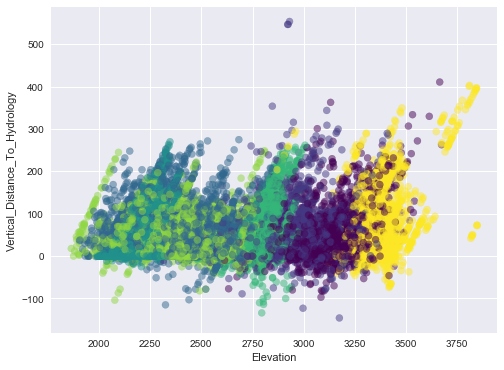

In [51]:
my_scatter(data.Elevation, data.Vertical_Distance_To_Hydrology)

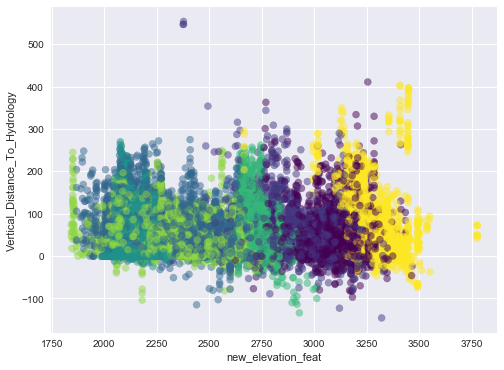

In [52]:
def new_elevation_feat(data):
    new_data = data.copy(deep=True)
    new_feature = new_data.Elevation - new_data.Vertical_Distance_To_Hydrology
    new_data['new_elevation_feat'] = new_feature
    return new_data

new_data = new_elevation_feat(data)
my_scatter(new_data.new_elevation_feat, new_data.Vertical_Distance_To_Hydrology)

In [53]:
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8349
Base LR:  0.6786, New LR:  0.6786


#### New Elevation Hydro Feature

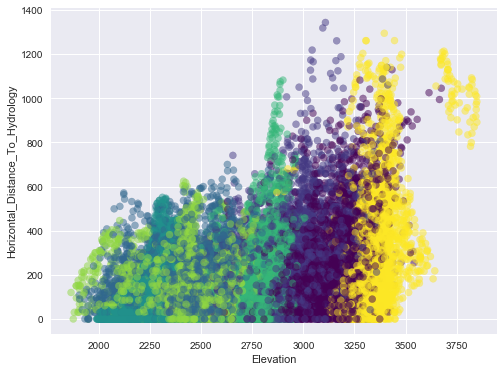

In [54]:
my_scatter(data.Elevation, data.Horizontal_Distance_To_Hydrology)

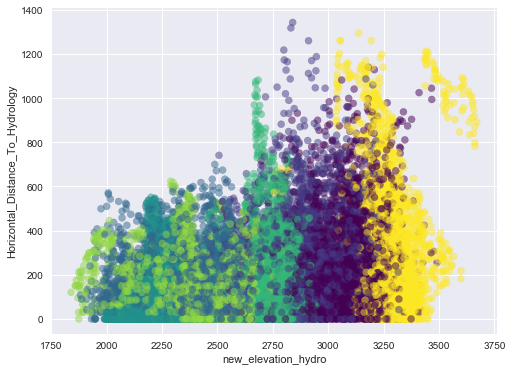

In [55]:
def new_elevation_hydro_feat(data):
    new_data = data.copy(deep=True)
    new_data['new_elevation_hydro'] = new_data.Elevation - new_data.Horizontal_Distance_To_Hydrology * .2
    return new_data

new_data = new_elevation_hydro_feat(data)
my_scatter(new_data.new_elevation_hydro, data.Horizontal_Distance_To_Hydrology)

In [56]:
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8359
Base LR:  0.6786, New LR:  0.6786


#### New Aspect Feature

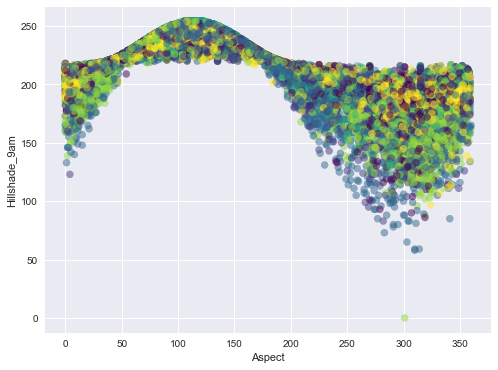

In [57]:
my_scatter(data.Aspect, data.Hillshade_9am)

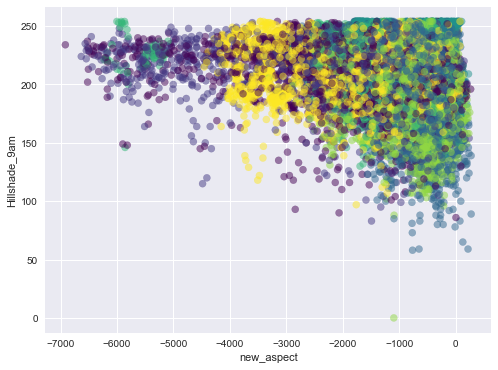

In [58]:
def new_aspect_feat(data):
    new_data = data.copy(deep=True)
    new_data['new_aspect'] = data.Aspect - data.Horizontal_Distance_To_Fire_Points
    return new_data

new_data = new_aspect_feat(data)
my_scatter(new_data.new_aspect, new_data.Hillshade_9am)

In [59]:
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8261
Base LR:  0.6786, New LR:  0.6784


#### New Hillshade Feature

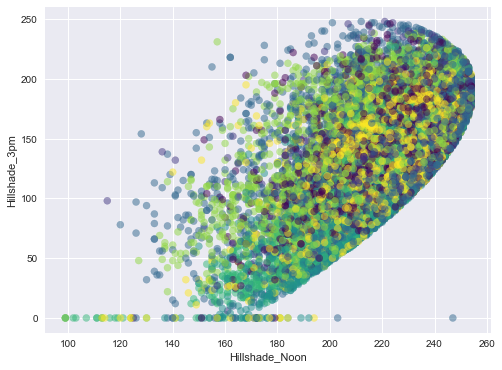

In [60]:
my_scatter(data.Hillshade_Noon, data.Hillshade_3pm)

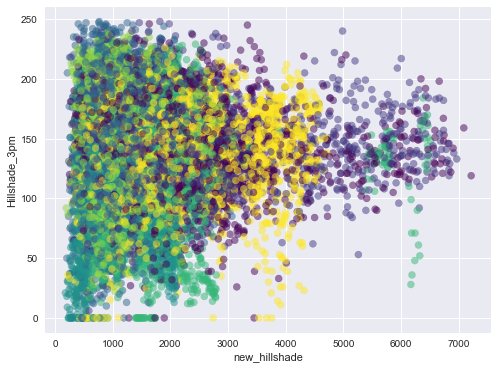

In [61]:
def new_hillshade_feat(data):
    new_data = data.copy(deep=True)
    new_data['new_hillshade'] = data.Hillshade_Noon + data.Horizontal_Distance_To_Fire_Points
    return new_data

new_data = new_hillshade_feat(data)
my_scatter(new_data.new_hillshade, new_data.Hillshade_3pm)

In [62]:
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8301
Base LR:  0.6786, New LR:  0.6784


#### New Aspect Hillshade Feature

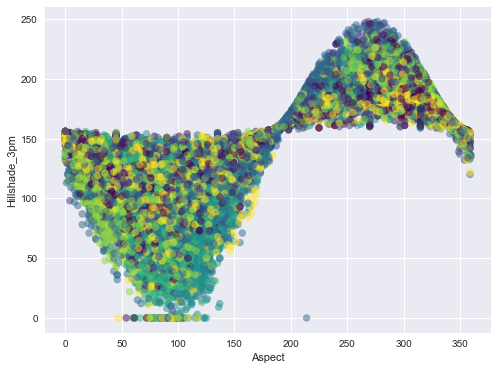

In [63]:
my_scatter(data.Aspect, data.Hillshade_3pm)

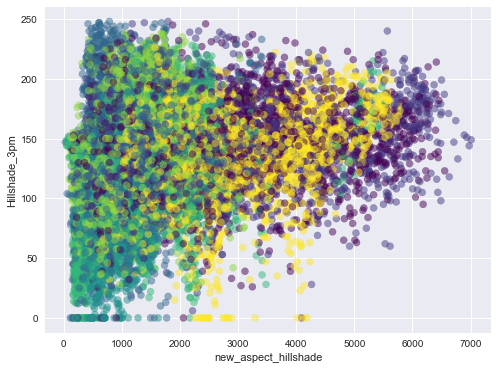

In [64]:
def new_aspect_hillshade_feat(data):
    new_data = data.copy(deep=True)
    new_data['new_aspect_hillshade'] = data.Aspect + data.Horizontal_Distance_To_Roadways
    return new_data

new_data = new_aspect_hillshade_feat(data)
my_scatter(new_data.new_aspect_hillshade, new_data.Hillshade_3pm)

In [65]:
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8295
Base LR:  0.6786, New LR:  0.6784


#### New Hillshade_Hillshade Feature

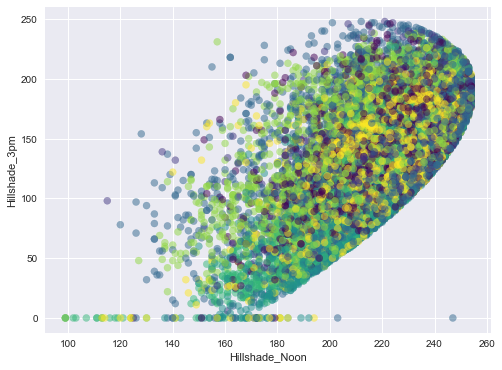

In [66]:
my_scatter(data.Hillshade_Noon, data.Hillshade_3pm)

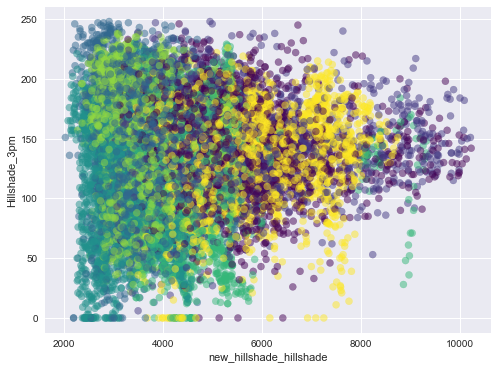

In [67]:
def new_hillshade_hillshade_feat(data):
    new_data = data.copy(deep=True)
    new_data['new_hillshade_hillshade'] = data.Hillshade_Noon - data.Aspect + \
        data.Horizontal_Distance_To_Fire_Points + data.Elevation + data.Horizontal_Distance_To_Hydrology
    return new_data

new_data = new_hillshade_hillshade_feat(data)
my_scatter(new_data.new_hillshade_hillshade, new_data.Hillshade_3pm)

In [68]:
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8323
Base LR:  0.6786, New LR:  0.6786


#### New Hillshade Hillshade 2 Feature

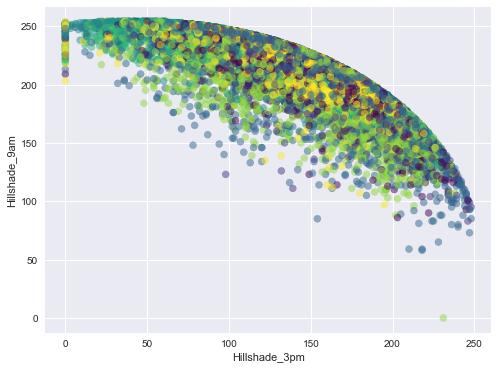

In [69]:
my_scatter(data.Hillshade_3pm, data.Hillshade_9am)

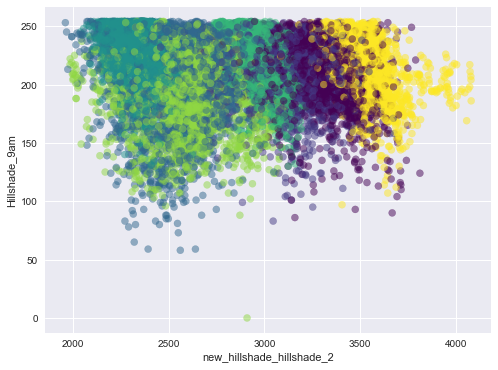

In [70]:
def new_hillshade_hillshade_2_feat(data):
    new_data = data.copy(deep=True)
    new_data['new_hillshade_hillshade_2'] = data.Hillshade_3pm + data.Aspect * .2 + data.Elevation
    return new_data

new_data = new_hillshade_hillshade_2_feat(data)
my_scatter(new_data.new_hillshade_hillshade_2, new_data.Hillshade_9am)

In [71]:
print_base_results(new_data)

Base RFC: 0.8257, New RFC: 0.8271
Base LR:  0.6786, New LR:  0.6784


## Parameter Tuning With New Features

In [140]:
### Add new features for RF
def get_new_features_data_rf():
    new_feature_funcs = [avg_horiz_feat, new_elevation_feat, new_elevation_hydro_feat,
                         new_aspect_feat, new_hillshade_feat]
    new_data = data.copy(deep=True)
    for func in new_feature_funcs:
        new_data = func(new_data)

    return new_data

new_data = get_new_features_data_rf()
new_data.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

### Random Forest

In [132]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

pipe = make_pipeline(RandomForestClassifier())

param_grid = {
    'randomforestclassifier__n_estimators': [1000, ], 
    'randomforestclassifier__criterion': ['entropy',],
    'randomforestclassifier__max_features': ['sqrt'],
    'randomforestclassifier__max_depth': [None, 35, 50],
    'randomforestclassifier__bootstrap': [False],
}
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, verbose=1)
%time grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.6min finished


CPU times: user 30.7 s, sys: 844 ms, total: 31.6 s
Wall time: 2min 7s


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'randomforestclassifier__max_features': ['sqrt'], 'randomforestclassifier__max_depth': [None, 35, 50], 'randomforestclassifier__n_estimators': [1000], 'randomforestclassifier__bootstrap': [False], 'randomforestclassifier__criterion': ['entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [133]:
print(grid.best_params_)
best_rfc = grid.best_estimator_
y_pred = best_rfc.predict(X_test)
print(np.mean(y_pred == y_test))
print(classification_report(y_test, y_pred, target_names=target_names))

{'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 35, 'randomforestclassifier__n_estimators': 1000, 'randomforestclassifier__bootstrap': False, 'randomforestclassifier__criterion': 'entropy'}
0.885571142285
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.80      0.80      0.80       722
   2 - Lodgepole Pine       0.82      0.72      0.77       750
   3 - Ponderosa Pine       0.88      0.88      0.88       690
4 - Cottonwood/Willow       0.95      0.98      0.96       727
            5 - Aspen       0.91      0.96      0.93       701
      6 - Douglas-fir       0.89      0.90      0.89       708
        7 - Krummholz       0.94      0.97      0.96       692

          avg / total       0.88      0.89      0.88      4990



In [139]:
# Show importance of new features

features = best_rfc.named_steps['randomforestclassifier'].feature_importances_
features = sorted(zip(features, new_data.columns), reverse=True)

for f in features:
    print('{:6.4f}, {}'.format(f[0], f[1]))

0.1509, new_elevation_hydro
0.1476, new_elevation_feat
0.1383, Elevation
0.0553, avg_horiz
0.0487, Horizontal_Distance_To_Roadways
0.0475, Wilderness_Area4
0.0341, Horizontal_Distance_To_Hydrology
0.0328, new_hillshade
0.0323, Horizontal_Distance_To_Fire_Points
0.0312, new_aspect
0.0289, Vertical_Distance_To_Hydrology
0.0281, Hillshade_9am
0.0261, Aspect
0.0230, Hillshade_Noon
0.0228, Hillshade_3pm
0.0198, Wilderness_Area1
0.0175, Slope
0.0168, Soil_Type10
0.0164, Wilderness_Area3
0.0099, Soil_Type3
0.0096, Soil_Type39
0.0089, Soil_Type38
0.0066, Soil_Type4
0.0045, Soil_Type30
0.0043, Soil_Type29
0.0036, Soil_Type40
0.0032, Soil_Type2
0.0031, Soil_Type17
0.0030, Soil_Type32
0.0029, Soil_Type23
0.0028, Wilderness_Area2
0.0025, Soil_Type33
0.0024, Soil_Type13
0.0023, Soil_Type22
0.0020, Soil_Type12
0.0018, Soil_Type11
0.0017, Soil_Type6
0.0010, Soil_Type24
0.0009, Soil_Type31
0.0009, Soil_Type20
0.0008, Soil_Type35
0.0007, Soil_Type1
0.0007, Soil_Type5
0.0003, Soil_Type16
0.0003, Soil_Ty

### Logistical Regression

In [144]:
### Add new features for LR
def get_new_features_data_lr():
    new_feature_funcs = [bin_hillshade_9am_feat, convert_to_cardinal_feat]
    new_data = data.copy(deep=True)
    for func in new_feature_funcs:
        new_data = func(new_data)
    return new_data

new_data = get_new_features_data_lr()
new_data.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

In [75]:
X_train, y_train, X_test, y_test = split_data(new_data, labels)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression())
c_vals = [25]
tol = [.01]
penalty = ['l1', 'l2']
degree = range(2, 3)
param_grid = {
    'polynomialfeatures__degree': degree,
    'logisticregression__C': c_vals,
    'logisticregression__tol': tol,
    'logisticregression__penalty': penalty,
}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

%time grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:  3.3min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.1min finished


CPU times: user 1min 55s, sys: 521 ms, total: 1min 55s
Wall time: 6min 3s


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'logisticregression__C': [25], 'polynomialfeatures__degree': range(2, 3), 'logisticregression__penalty': ['l1', 'l2'], 'logisticregression__tol': [0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [76]:
print('Best params for Logistic Regression: {}'. \
      format(grid.best_params_))

print(grid.best_params_)
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test)
print('Accuracy: {}'.format(np.mean(y_pred == y_test)))
print(classification_report(y_test, y_pred, target_names=target_names))

Best params for Logistic Regression: {'logisticregression__C': 25, 'logisticregression__tol': 0.01, 'logisticregression__penalty': 'l2', 'polynomialfeatures__degree': 2}
{'logisticregression__C': 25, 'logisticregression__tol': 0.01, 'logisticregression__penalty': 'l2', 'polynomialfeatures__degree': 2}
Accuracy: 0.781563126252505
                       precision    recall  f1-score   support

       1 - Spruce/Fir       0.69      0.72      0.71       722
   2 - Lodgepole Pine       0.72      0.58      0.64       750
   3 - Ponderosa Pine       0.69      0.70      0.70       690
4 - Cottonwood/Willow       0.90      0.95      0.92       727
            5 - Aspen       0.81      0.88      0.84       701
      6 - Douglas-fir       0.73      0.72      0.73       708
        7 - Krummholz       0.91      0.94      0.92       692

          avg / total       0.78      0.78      0.78      4990



## Error analysis

In [141]:
rfc = best_rfc.get_params()['randomforestclassifier']

In [142]:
new_data = get_new_features_data_rf()
X_train, y_train, X_test, y_test = split_data(new_data, labels)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(np.mean(y_pred == y_test))

0.88496993988


In [143]:
mat = confusion_matrix(y_test, y_pred)

print(mat)
# sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
# plt.xlabel('predicted value')
# plt.ylabel('true value');

[[576 103   0   0  11   0  32]
 [128 540  13   0  44  17   8]
 [  0   0 604  21   4  61   0]
 [  0   0  11 712   0   4   0]
 [  2   8  16   0 671   4   0]
 [  0   6  42  17   3 640   0]
 [ 17   2   0   0   0   0 673]]


In [161]:
# look at the biggest errors:
# get the probabilites for each example
probs = rfc.predict_proba(X_test)

# get the max probability for each example
max_probs = np.max(probs, axis=1)

# get the probs of the true label
true_label_probs = probs[np.arange(len(probs)), y_test-1]

r_ratio = max_probs / true_label_probs

# get the indexes for the top 3 R ratio
indexes = np.argpartition(r_ratio, -3)[-3:]

for index in indexes:
    print('\n============\n')
    print(index)
    print(X_test.iloc[index], '\n')
    print('True label:', y_test.iloc[index])
    print('Predicated label:', y_pred[index])
    print('Probability of labels: {}'.format(probs[index]))



2910
Elevation                             2314.000000
Aspect                                 329.000000
Slope                                   13.000000
Horizontal_Distance_To_Hydrology       182.000000
Vertical_Distance_To_Hydrology         -10.000000
Horizontal_Distance_To_Roadways         90.000000
Hillshade_9am                          189.000000
Hillshade_Noon                         225.000000
Hillshade_3pm                          175.000000
Horizontal_Distance_To_Fire_Points     722.000000
Wilderness_Area1                         0.000000
Wilderness_Area2                         0.000000
Wilderness_Area3                         0.000000
Wilderness_Area4                         1.000000
Soil_Type1                               0.000000
Soil_Type2                               0.000000
Soil_Type3                               0.000000
Soil_Type4                               0.000000
Soil_Type5                               0.000000
Soil_Type6                               0.

### Cover Type 1 Errors

In [162]:
# look at errors with cover type 1 
X_errors = X_test.copy(deep=True)
X_errors.insert(0, 'pred', y_pred)
X_errors.insert(0, 'true', y_test)

error_msk = (y_pred != 1) & (y_test == 1)
X_errors = X_errors[error_msk]
#probs = rfc.predict_proba(X_errors.drop(['pred', 'true'], axis=1))

X_errors.head(20)

true  pred  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
1169      1     2       2868      72     20                                30   
947       1     2       2851     323     11                               170   
6591      1     5       2760     130      4                                 0   
13635     1     2       3101     108      5                               376   
95        1     2       2860      31     10                               295   
8056      1     2       2960     194     10                               120   
146       1     2       2962      88     16                               190   
14847     1     7       3337      60     17                                90   
9034      1     2       3087     187     10                               323   
9420      1     7       3325     180     13                               255   
6394      1     7       3338       9     24                               134   
11618     1     2       3070     105     13                               350   
2836      1     7       3308     136     21                               787   
6546      1     7       3371     122     14                               499   
11444     1     2       2782      45      5                                 0   
11697     1     2       2936      63      7                                67   
11390     1     2       3093     258      8                                30   
13687     1     2       2867      56     21                               120   
9826      1     2       3292     285     29                               999   
654       1     2       2919      76      4                               228   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
1169                               15                             1087   
947                                 5                             2910   
6591                                0                              664   
13635                              24                             2620   
95                                 98                             3644   
8056                               15                             2375   
146                                23                             6095   
14847                              -5                             2419   
9034                               18                              999   
9420                               46                             3834   
6394                               45                             2542   
11618                              95                             3743   
2836                              -39                             1316   
6546                               89                             2268   
11444                               0                             2192   
11697                               1                             2226   
11390                               0                             6194   
13687                               2                              170   
9826                              194                             3695   
654                                 6                             4914   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
1169             238             196             80   
947              191             228            177   
6591             226             237            145   
13635            229             234            138   
95               218             218            135   
8056             218             249            164   
146              242             212             95   
14847            231             202             99   
9034             221             247            159   
9420             224             248            153   
6394             185             184            129   
11618            242             223            108   
2836             247             22

In [163]:
# Describe the accurate predictions for label 1
true_msk = (y_pred == 1) & (y_test == 1)
X_true = X_test[true_msk]
X_true.head(20)

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
14660       2991     353     17                               268   
10150       2851     323     14                               120   
13983       3073     270     11                                60   
850         3050      72     10                               124   
7699        3087      62     25                               360   
6262        3226     121     19                               242   
8964        2944      41     25                               258   
1545        3145      63     13                               362   
8760        3142     245     15                               150   
9823        3152      30     13                                30   
1571        3224     352      2                               134   
9277        3149      22     10                               295   
346         3136     185     10                                42   
10277       3194     180     20                               210   
9638        3089     338      4                               379   
10032       3233     290     13                               350   
652         3149     120     13                               150   
1536        3267     319      4                               270   
9893        3286     341     12                                30   
1025        3170      14     12                               524   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
14660                             -40                              960   
10150                              26                             2466   
13983                              16                             1500   
850                                26                             3538   
7699                              -81                              973   
6262                               64                             1549   
8964                               75                             1651   
1545                               16                             2200   
8760                               32                             1514   
9823                                1                              685   
1571                                5                             3220   
9277                               29                             1952   
346                                 4                             3623   
10277                               7                             2206   
9638                               46                              485   
10032                              49                              234   
652                                33                             3438   
1536                               22                             5675   
9893                                6                              674   
1025                               63                             5752   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
14660            188             207            155   
10150            183             224            181   
13983            192             244            192   
850              231             221            122   
7699             232             181             67   
6262             249             221             92   
8964             214             177             85   
1545             231             214            113   
8760             189             251            198   
9823             216             212            130   
1571             216             236            157   
9277             214             218            140   
346              222             248            158   
10277            223             248            148   
9638             210             233            162   
10032            182             238            195   
652              242             229            114   
1536        

In [164]:
X_true.describe()

Elevation      Aspect       Slope  Horizontal_Distance_To_Hydrology  \
count   576.000000  576.000000  576.000000                        576.000000   
mean   3155.496528  158.847222   13.048611                        268.317708   
std     121.518737  121.760924    6.758008                        224.663005   
min    2702.000000    0.000000    1.000000                          0.000000   
25%    3072.750000   48.000000    8.000000                         90.000000   
50%    3161.500000  117.000000   12.000000                        212.000000   
75%    3234.000000  292.250000   17.000000                        390.250000   
max    3675.000000  359.000000   40.000000                       1045.000000   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
count                      576.000000                       576.000000   
mean                        38.197917                      2647.328125   
std                         52.989276                      1510.686016   
min                        -81.000000                       108.000000   
25%                          3.000000                      1423.000000   
50%                         22.000000                      2432.500000   
75%                         56.000000                      3706.500000   
max                        330.000000                      6335.000000   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
count     576.000000      576.000000     576.000000   
mean      210.935764      222.324653     144.083333   
std        24.628461       18.130075      37.197803   
min        90.000000      125.000000       0.000000   
25%       197.750000      213.000000     123.000000   
50%       214.000000      225.000000     145.000000   
75%       229.000000      235.000000     170.000000   
max       254.000000      253.000000     245.000000   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
count                          576.000000        576.000000        576.000000   
mean                          1932.322917          0.519097          0.085069   
std                           1200.186439          0.500069          0.279227   
min                             42.000000          0.000000          0.000000   
25%                            988.500000          0.000000          0.000000   
50%                           1745.500000          1.000000          0.000000   
75%                           2651.500000          1.000000          0.000000   
max                           6482.000000          1.000000          1.000000   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
count        576.000000             576.0       576.0       576.0       576.0   
mean           0.395833               0.0         0.0         0.0         0.0   
std            0.489454               0.0         0.0         0.0         0.0   
min            0.000000               0.0         0.0         0.0         0.0   
25%            0.000000               0.0         0.0         0.0         0.0   
50%            0.000000               0.0         0.0         0.0         0.0   
75%            1.000000               0.0         0.0         0.0         0.0   
max            1.000000               0.0         0.0         0.0         0.0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
count  576.000000       576.0       576.0       576.0       576.0       576.0   
mean     0.001736         0.0         0.0         0.0         0.0         0.0   
std      0.041667         0.0         0.0         0.0         0.0         0.0   
min      0.000000         0.0         0.0         0.0         0.0         0.0   
25%      0.000000         0.0         0.0         0.0         0.0         0.0   
50%      0.000000         0.0         0.0         0.0         0.0         0.0   
75%      0.000000         0.0         0.0         0.0         0.0         0.0   
max      1.000000

In [165]:
# Describe the wrong predictions for label 1
X_errors = X_test[msk]
X_errors.describe()

Elevation      Aspect       Slope  Horizontal_Distance_To_Hydrology  \
count   148.000000  148.000000  148.000000                        148.000000   
mean   3031.222973  154.554054   13.351351                        269.932432   
std     189.316559  113.741280    7.132244                        229.121916   
min    2613.000000    2.000000    1.000000                          0.000000   
25%    2883.250000   63.750000    8.000000                         90.000000   
50%    2990.500000  114.000000   13.000000                        213.000000   
75%    3187.750000  263.250000   17.000000                        362.000000   
max    3473.000000  358.000000   38.000000                       1082.000000   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
count                      148.000000                       148.000000   
mean                        48.702703                      2606.114865   
std                         66.382058                      1530.780578   
min                        -40.000000                       127.000000   
25%                          6.000000                      1379.250000   
50%                         25.500000                      2318.000000   
75%                         63.500000                      3670.250000   
max                        363.000000                      6194.000000   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
count     148.000000      148.000000     148.000000   
mean      214.763514      222.067568     138.777027   
std        26.601970       17.436244      33.939085   
min       108.000000      158.000000       0.000000   
25%       202.000000      212.000000     117.500000   
50%       222.000000      225.000000     139.000000   
75%       231.250000      234.000000     160.000000   
max       254.000000      251.000000     234.000000   

       Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
count                          148.000000        148.000000        148.000000   
mean                          2217.236486          0.520270          0.040541   
std                           1403.026158          0.501285          0.197893   
min                            212.000000          0.000000          0.000000   
25%                           1266.000000          0.000000          0.000000   
50%                           2043.500000          1.000000          0.000000   
75%                           2589.750000          1.000000          0.000000   
max                           6853.000000          1.000000          1.000000   

       Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
count        148.000000             148.0       148.0       148.0       148.0   
mean           0.439189               0.0         0.0         0.0         0.0   
std            0.497973               0.0         0.0         0.0         0.0   
min            0.000000               0.0         0.0         0.0         0.0   
25%            0.000000               0.0         0.0         0.0         0.0   
50%            0.000000               0.0         0.0         0.0         0.0   
75%            1.000000               0.0         0.0         0.0         0.0   
max            1.000000               0.0         0.0         0.0         0.0   

       Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
count       148.0       148.0       148.0       148.0       148.0       148.0   
mean          0.0         0.0         0.0         0.0         0.0         0.0   
std           0.0         0.0         0.0         0.0         0.0         0.0   
min           0.0         0.0         0.0         0.0         0.0         0.0   
25%           0.0         0.0         0.0         0.0         0.0         0.0   
50%           0.0         0.0         0.0         0.0         0.0         0.0   
75%           0.0         0.0         0.0         0.0         0.0         0.0   
max           0.0

In [166]:
# How to fix this error???


## Test results

In [123]:
test_df = pd.read_csv("../data/test.csv")
#test_df = test_df.drop(['Id'], axis=1)


print(test_df.shape)

# ### Add new features
# for key, value in new_features.items():
#     test_df[key] = value

test_df.head()

(565892, 55)


Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6645                 1                 0   
1                                6675                 1                 0   
2                                6344                 1                 0   
3                                6374                 1                 0   
4                                6404                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0

In [75]:
rfc = RandomForestClassifier(criterion='entropy', max_depth=30, 
                             bootstrap=False, n_estimators=1000, 
                             max_features='sqrt', n_jobs=-1)
rfc.fit(data, labels)

test_df['Cover_Type'] = pd.Series(rfc.predict(test_df.drop(['Id'], axis=1)))

submission = pd.concat([test_df['Id'].astype(int), test_df['Cover_Type']], axis=1)
submission = submission.set_index('Id')
submission.to_csv('submission.csv')
submission.head()

Cover_Type
Id               
15121           2
15122           1
15123           2
15124           2
15125           2

In [76]:
submission.shape

(565892, 1)

In [222]:
# {'svc__C': 100, 'svc__gamma': 0.05, 'svc__kernel': 'rbf'}
svc_pipe = make_pipeline(StandardScaler(), SVC(C=100, gamma=.05, kernel='rbf'))
svc_pipe.fit(data, labels)

test_df['Cover_Type'] = pd.Series(svc_pipe.predict(test_df.drop(['Id'], axis=1)))

submission = pd.concat([test_df['Id'].astype(int), test_df['Cover_Type']], axis=1)
submission = submission.set_index('Id')
submission.to_csv('submission.csv')
submission.head()

Cover_Type
Id               
15121           2
15122           1
15123           2
15124           2
15125           2

### Logistic Regression

In [110]:
new_data = convert_to_cardinal(data)

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), 
                     LogisticRegression(C=25, tol=.01, penalty='l2'))
pipe.fit(new_data, labels)

new_test_df = convert_to_cardinal(test_df.drop(['Id'], axis=1))

output_df = pd.DataFrame()
output_df['Cover_Type'] = pd.Series(pipe.predict(new_test_df))

submission = pd.concat([test_df['Id'].astype(int), output_df['Cover_Type']], axis=1)
submission = submission.set_index('Id')
submission.to_csv('submission.csv')

## Problems with Test Data

In [127]:
test_df.drop(['Id'], axis=1).describe()

# We see that Soil_Type7 and Soil_Type15 have values which were not present in our training set

Elevation         Aspect          Slope  \
count  565892.000000  565892.000000  565892.000000   
mean     2964.977407     155.629558      14.039635   
std       273.157030     111.962120       7.450155   
min      1859.000000       0.000000       0.000000   
25%      2818.000000      58.000000       9.000000   
50%      2999.000000     127.000000      13.000000   
75%      3164.000000     260.000000      18.000000   
max      3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     565892.000000                   565892.000000   
mean                         270.556622                       46.294408   
std                          212.500153                       58.209469   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          228.000000                       29.000000   
75%                          390.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    565892.000000  565892.000000   565892.000000   
mean                       2367.143116     212.131133      223.435026   
std                        1561.482002      26.661063       19.668053   
min                           0.000000       0.000000        0.000000   
25%                        1116.000000     198.000000      213.000000   
50%                        2018.000000     218.000000      226.000000   
75%                        3349.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count  565892.000000                       565892.000000     565892.000000   
mean      142.726951                         1992.826227          0.454502   
std        38.030094                         1327.396895          0.497926   
min         0.000000                            0.000000          0.000000   
25%       119.000000                         1034.000000          0.000000   
50%       143.000000                         1723.000000          0.000000   
75%       168.000000                         2561.000000          1.000000   
max       254.000000                         7173.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4     Soil_Type1  \
count     565892.000000     565892.000000     565892.000000  565892.000000   
mean           0.051927          0.436506          0.057066       0.004729   
std            0.221880          0.495953          0.231968       0.068604   
min            0.000000          0.000000          0.000000       0.000000   
25%            0.000000          0.000000          0.000000       0.000000   
50%            0.000000          0.000000          0.000000       0.000000   
75%            0.000000          1.000000          0.000000       0.000000   
max            1.000000          1.000000          1.000000       1.000000   

          Soil_Type2     Soil_Type3     Soil_Type4     Soil_Type5  \
count  565892.000000  565892.000000  565892.000000  565892.000000   
mean        0.012197       0.006823       0.020416       0.002531   
std         0.109763       0.082318       0.141417       0.050241   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

          Soil_Type6     Soil_Type7     Soil_Type8     Soil_Type9  \
count  565892.000000  565892.000000  565892.000000  565892.000000   
mean        0.010470    

In [128]:
data.describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  \
count   15120.000000                        15120.000000      15120.000000   
mean      135.091997                         1511.147288          0.237897   
std        45.895189                         1099.936493          0.425810   
min         0.000000                            0.000000          0.000000   
25%       106.000000                          730.000000          0.000000   
50%       138.000000                         1256.000000          0.000000   
75%       167.000000                         1988.250000          0.000000   
max       248.000000                         6993.000000          1.000000   

       Wilderness_Area2  Wilderness_Area3  Wilderness_Area4    Soil_Type1  \
count      15120.000000      15120.000000      15120.000000  15120.000000   
mean           0.033003          0.419907          0.309193      0.023479   
std            0.178649          0.493560          0.462176      0.151424   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      0.000000   
50%            0.000000          0.000000          0.000000      0.000000   
75%            0.000000          1.000000          1.000000      0.000000   
max            1.000000          1.000000          1.000000      1.000000   

         Soil_Type2    Soil_Type3    Soil_Type4    Soil_Type5    Soil_Type6  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.041204      0.063624      0.055754      0.010913      0.042989   
std        0.198768      0.244091      0.229454      0.103896      0.202840   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Soil_Type7    Soil_Type8    Soil_Type9   Soil_Type10   Soil_Type11  \
count     15120.0  15120.00000